# Analiza danych w języku Python - ćwiczenia laboratoryjne 2024/2025

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika. Wyjątek stanowi ostatni z projektów, gdzie po konsultacji z prowadzącym zajęcia możliwa jest większa swoboda w doborze pakietów.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają na celu wyłapać podstawowe błędy. Przejście przez kod wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem). Rozmiar poziomy figur nie powinien przekraczać 20 cali.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu:
Członkowie:

---

## Zestaw zadań 3: Ruch rowery na moście Fremont w Seattle (Notatnik 2/3)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Wczytanie danych
Poniższy kod wczytuje do zmiennych `bike_traffic_data` oraz `weather_data` dane z przygotowanych wcześniej plików bike_traffic_data.pkl i weather_data.pkl.

In [3]:
# Ruch rowerowy
bike_traffic_data = pd.read_pickle("bike_traffic_data.pkl")
bike_traffic_data

,Total,East,West
Date,,,
2022-01-01 00:00:00,0.0,0.0,0.0
2022-01-01 01:00:00,0.0,0.0,0.0
2022-01-01 02:00:00,1.0,0.0,1.0
2022-01-01 03:00:00,0.0,0.0,0.0
2022-01-01 04:00:00,0.0,0.0,0.0
...,...,...,...
2022-12-31 19:00:00,14.0,6.0,8.0
2022-12-31 20:00:00,20.0,13.0,7.0
2022-12-31 21:00:00,16.0,6.0,10.0


In [4]:
# Pogoda
weather_data = pd.read_pickle("weather_data.pkl")
weather_data

Temperature                      Precipitation Snow        \
                   Min       Avg        Max         Total Fall Depth   
Date                                                                   
2022-01-01   -5.555556 -2.222222   1.111111         0.000  0.0  76.2   
2022-01-02   -1.111111  2.777778   6.111111        20.066  0.0  76.2   
2022-01-03    0.555556  2.777778   5.000000        12.446  0.0   0.0   
2022-01-04    1.666667  3.888889   5.555556         5.588  0.0   0.0   
2022-01-05    1.111111  2.777778   3.888889         8.382  0.0   0.0   
...                ...       ...        ...           ...  ...   ...   
2022-12-27    6.666667  9.444444  11.666667         6.858  0.0   0.0   
2022-12-28    5.000000  6.666667   7.777778         0.762  0.0   0.0   
2022-12-29    5.000000  6.666667   7.777778         8.890  0.0   0.0   
2022-12-30    5.555556  8.888889  11.666667         9.144  0.0   0.0   
2022-12-31    6.111111  7.777778   9.444444         0.254  0.0   0.0   

                Wind                   Sky  
           Avg speed Max speed Cloud cover  
Date                                        
2022-01-01  3.576320   5.36448         0.8  
2022-01-02  3.799840   8.94080         1.0  
2022-01-03  5.140960  11.62304         0.9  
2022-01-04  4.336288   9.83488         0.9  
2022-01-05  2.235200   4.47040         1.0  
...              ...       ...         ...  
2022-12-27  7.733792  16.54048         1.0  
2022-12-28  5.766816  12.51712         0.8  
2022-12-29  2.771648   7.59968         1.0  
2022-12-30  6.437376  11.62304         0.9  
2022-12-31  4.470400   9.38784         0.9  

[365 rows x 9 columns]

### Zadnie 2: Przegląd danych - ruch rowerowy [15 pkt]

#### a) Tabele

Przygotuj trzy tablice prezentujące różne aspekty ruchu rowerowego według poniższych wytycznych.

Tablica `daily_bike_traffic_data` prezentuje sumaryczną liczbę rowerzystów przejeżdżających przez most w poszczególnych dniach roku w sumie oraz z podziałem na zachodnią i wschodnią stronę mostu.
> Indeks: Date</br>
> `pandas.DatetimeIndex` zawierający okresy czasu, w których dokonywane były zliczenia rowerzystów.</br>

> Kolumny: Total, East, West</br>
> Kolumny zawierają liczbę rowerzystów przejeżdżających przez most w poszczególnych dniach roku w sumie oraz wraz z podziałem na zachodnią i wschodnią stronę mostu.
       
Tablica `bike_traffic_by_weekday_data` prezentuje średnią liczbę rowerzystów przejeżdżających przez most w poszczególnych dniach tygodnia w sumie oraz z podziałem na zachodnią i wschodnią stronę mostu.

> Indeks: Day</br>
> Dni tygodnia (Monday, Tuesday ... ).</br>

> Kolumny: Total, East, West</br>
> Kolumny zawierają średnią liczbę rowerzystów przejeżdżających przez most w poszczególnych dniach tygodnia w sumie oraz wraz z podziałem na zachodnią i wschodnią stronę mostu.
    
Tablica `weekday_weekend_hourly_bike_traffic_data`  prezentuje średnią liczbę rowerzystów przejeżdżających przez most w poszczególnych godzinach w sumie oraz z podziałem na zachodnią i wschodnią stronę mostu, a także z podziałem na dni robocze i weekend.

> Indeks: Hour </br>
> Godziny, dla których liczone są wartości średnie (0, 1, 2 ...).

> Kolumny: </br>
> 1 rzędu: Weekday, Weekend</br>
> 2 rzędu: Total, East, West (ten sam zestaw kolumn dla każdego okresu tygodnia)</br>
> Kolumny zawierają średnią liczbę rowerzystów przejeżdżających przez most w poszczególnych godzinach w sumie oraz wraz z podziałem na zachodnią i wschodnią stronę mostu.

Zapisz tablicę `daily_bike_traffic_data` do pliku daily_bike_traffic_data.pkl.

Wyświetl przygotowane tablice w taki sposób aby zawarte w nich liczby rowerzystów wyświetlały się z dokładnością 0 miejsc po przecinku, a średnie liczby rowerzystów z dokładnością 2 miejsc po przecinku. W przypadku tablicy `daily_bike_traffic_data` wyświetl tylko 10 pierwszych wierszy tablicy oraz sformatuj wyświetlany indek tak aby pokazywał same daty (bez godzin).

In [12]:
# Agregacja danych z poszczególnych dni roku
#suma ruchu w kazdej dobie (D=doba)
daily_bike_traffic_data = (bike_traffic_data.resample('D').sum())

daily_bike_traffic_data.index.name = 'Date'   #wiersze to data

daily_bike_traffic_data.to_pickle('daily_bike_traffic_data.pkl')
pd.options.display.float_format = '{:.0f}'.format  
display(daily_bike_traffic_data.head(10))

,Total,East,West
Date,,,
2022-01-01,33,23,10
2022-01-02,37,20,17
2022-01-03,253,93,160
2022-01-04,577,220,357
2022-01-05,713,261,452
2022-01-06,588,231,357
2022-01-07,650,250,400
2022-01-08,1147,548,599
2022-01-09,1923,912,1011


In [6]:
### Komórka testowa

# Test 1 Kształt tablicy
assert daily_bike_traffic_data.shape == (365, 3)
# Test 2 Kolumny
assert len(set(list(daily_bike_traffic_data.columns)) & set(['Total', 'East', 'West'])) == 3
# Test 3 Indeks
assert (daily_bike_traffic_data.index.name == 'Date') == True
assert isinstance(weather_data.index, pd.DatetimeIndex) == True
assert weather_data.index.values.min() == np.datetime64('2022-01-01T00:00:00.000000000')
assert weather_data.index.values.max() == np.datetime64('2022-12-31T00:00:00.000000000')
# Test 4 Zawartość kolumn
assert np.all(np.isclose(daily_bike_traffic_data[['Total', 'East', 'West']].min().values, np.array([23., 12., 10.]))) == True
assert np.all(np.isclose(daily_bike_traffic_data[['Total', 'East', 'West']].max().values, np.array([4233., 1733., 3031.]))) == True

In [7]:
# Agregacja danych z poszczególnych dni tygodnia
#grupowanie po nazwie dnia tygodnia, srednia z tego
bike_traffic_by_weekday_data = (
    daily_bike_traffic_data 
    .groupby(daily_bike_traffic_data .index.day_name())
    .mean()
    .reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
)
bike_traffic_by_weekday_data.index.name = 'Day'

with pd.option_context('display.float_format', '{:.2f}'.format):
    display(bike_traffic_by_weekday_data)

,Total,East,West
Day,,,
Monday,2093.15,820.81,1272.35
Tuesday,2579.96,983.83,1596.13
Wednesday,2538.46,971.58,1566.88
Thursday,2406.71,926.60,1480.12
Friday,2087.44,843.54,1243.90
Saturday,1929.96,843.92,1086.04
Sunday,1664.44,771.58,892.87


In [8]:
### Komórka testowa

# Test 1 Kształt tablicy
assert bike_traffic_by_weekday_data.shape == (7, 3)
# Test 2 Kolumny
assert len(set(list(bike_traffic_by_weekday_data.columns)) & set(['Total', 'East', 'West'])) == 3
# Test 3 Indeks
assert (bike_traffic_by_weekday_data.index.name == 'Day') == True
assert len(set(list(bike_traffic_by_weekday_data.index)) & set(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])) == 7
# Test 4 Zawartość kolumn
assert np.all(np.isclose(bike_traffic_by_weekday_data.min().values, np.array([1664.44230769,  771.57692308,  892.86538462]))) == True
assert np.all(np.isclose(bike_traffic_by_weekday_data.max().values, np.array([2579.96153846,  983.82692308, 1596.13461538]))) == True

In [9]:
# Agregacja danych z konkretnych okresów tygodnia (dzień roboczy/weekend)
#maska by rozdzielic weekend i robocze
is_weekday = bike_traffic_data.index.weekday < 5           

#dni robocze: srednia z godzin
weekday = (bike_traffic_data[is_weekday].groupby(bike_traffic_data[is_weekday].index.hour).mean())
#weekend: srednia z godzin
weekend= (bike_traffic_data[~is_weekday].groupby(bike_traffic_data[~is_weekday].index.hour).mean())

#zlaczenie
weekday_weekend_hourly_bike_traffic_data = pd.concat({'Weekday': weekday, 'Weekend': weekend},axis=1)
weekday_weekend_hourly_bike_traffic_data.index.name = 'Hour'  

with pd.option_context('display.float_format', '{:.2f}'.format):
    display(weekday_weekend_hourly_bike_traffic_data)

Weekday              Weekend            
       Total  East   West   Total  East  West
Hour                                         
0       6.57  2.53   4.04   14.65  6.19  8.46
1       3.07  1.24   1.83    8.71  3.30  5.42
2       1.99  0.93   1.06    5.34  2.30  3.04
3       1.75  0.87   0.88    2.83  1.30  1.53
4       6.89  2.46   4.43    3.34  1.08  2.27
5      19.97  7.39  12.58    5.36  1.99  3.37
6      70.69 29.96  40.73   16.30  6.21 10.10
7     167.51 72.51  95.00   27.57 11.28 16.30
8     236.53 99.02 137.52   57.06 24.93 32.12
9     148.88 56.85  92.03   83.65 37.29 46.36
10     88.15 36.07  52.09  118.65 50.77 67.88
11     82.62 37.51  45.11  150.36 67.26 83.10
12     89.04 40.60  48.44  172.18 80.84 91.34
13     93.60 41.43  52.17  177.58 84.53 93.05
14    107.41 44.82  62.58  187.73 87.79 99.94
15    149.13 59.88  89.25  176.96 85.29 91.68
16    229.00 79.64 149.36  157.24 73.32 83.91
17    324.42 98.70 225.72  124.90 57.16 67.74
18    220.13 77.61 142.52   97.00 43.69 53.31
19    121.00 47.49  73.51   80.87 30.92 49.94
20     74.53 30.71  43.82   46.57 20.88 25.70
21     48.65 21.61  27.03   44.60 14.43 30.17
22     30.22 11.84  18.37   22.90  8.96 13.93
23     19.38  7.59  11.79   16.16  6.43  9.73

In [10]:
### Komórka testowa

# Test 1 Kształt tablicy
assert weekday_weekend_hourly_bike_traffic_data.shape == (24, 6)
# Test 2 Kolumny
assert len(set(list(weekday_weekend_hourly_bike_traffic_data.columns)) & set(list(weekday_weekend_hourly_bike_traffic_data.columns))) == 6
# Test 3 Indeks
assert (weekday_weekend_hourly_bike_traffic_data.index.name == 'Hour') == True
assert weekday_weekend_hourly_bike_traffic_data.index.values.min() == 0
assert weekday_weekend_hourly_bike_traffic_data.index.values.max() == 23
# Test 4 Zawartość kolumn
assert np.all(np.isclose(weekday_weekend_hourly_bike_traffic_data.min().values, np.array([1.75, 0.87307692, 0.87692308, 2.82857143, 1.07619048, 1.53333333]))) == True
assert np.all(np.isclose(weekday_weekend_hourly_bike_traffic_data.max().values, np.array([324.42307692, 99.01923077, 225.72307692, 187.73333333, 87.79047619, 99.94285714]))) == True

#### b) Wykresy

Zwizualizuj dane z tablic `daily_bike_traffic_data`, `bike_traffic_by_weekday_data` oraz `weekday_weekend_hourly_bike_traffic_data` za pomocą wykresów liniowych. Przygotuj:
- wykres prezentujący liczbę rowerzystów przejeżdżających przez most w poszczególnych dniach roku w sumie oraz z podziałem na zachodnią i wschodnią stronę mostu,
- wykres prezentujący średnią liczbę rowerzystów przejeżdżających przez most w poszczególnych dniach tygodnia w sumie oraz z podziałem na zachodnią i wschodnią stronę mostu,
- wykres prezentujący średnią liczbę rowerzystów przejeżdżających przez most w poszczególnych godzinach w dni robocze w sumie oraz z podziałem na zachodnią i wschodnią stronę mostu,
- wykres prezentujący średnią liczbę rowerzystów przejeżdżających przez most w poszczególnych godzinach w weekendy w sumie oraz z podziałem na zachodnią i wschodnią stronę mostu.

Zestaw wykresy na pojedynczej figurze (siatka wykresów 2x3, przy czym wykres sum dziennych zajmuje wszystkie trzy pola w górnym wierszu figury). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw różne od domyślnych i od siebie nawzajem kolory wykresów poszczególnych parametrów (każdy z parametrów ma na wszystkich wykresach ten sam kolor),
- dodaj do figury pojedynczą legendę zawierającą nazwy zwizualizowanych parametrów i zlokalizowaną w dolnej części figury, pod wykresami,
- dopasuj zakresy osi wykresów do zakresu wartości danych.

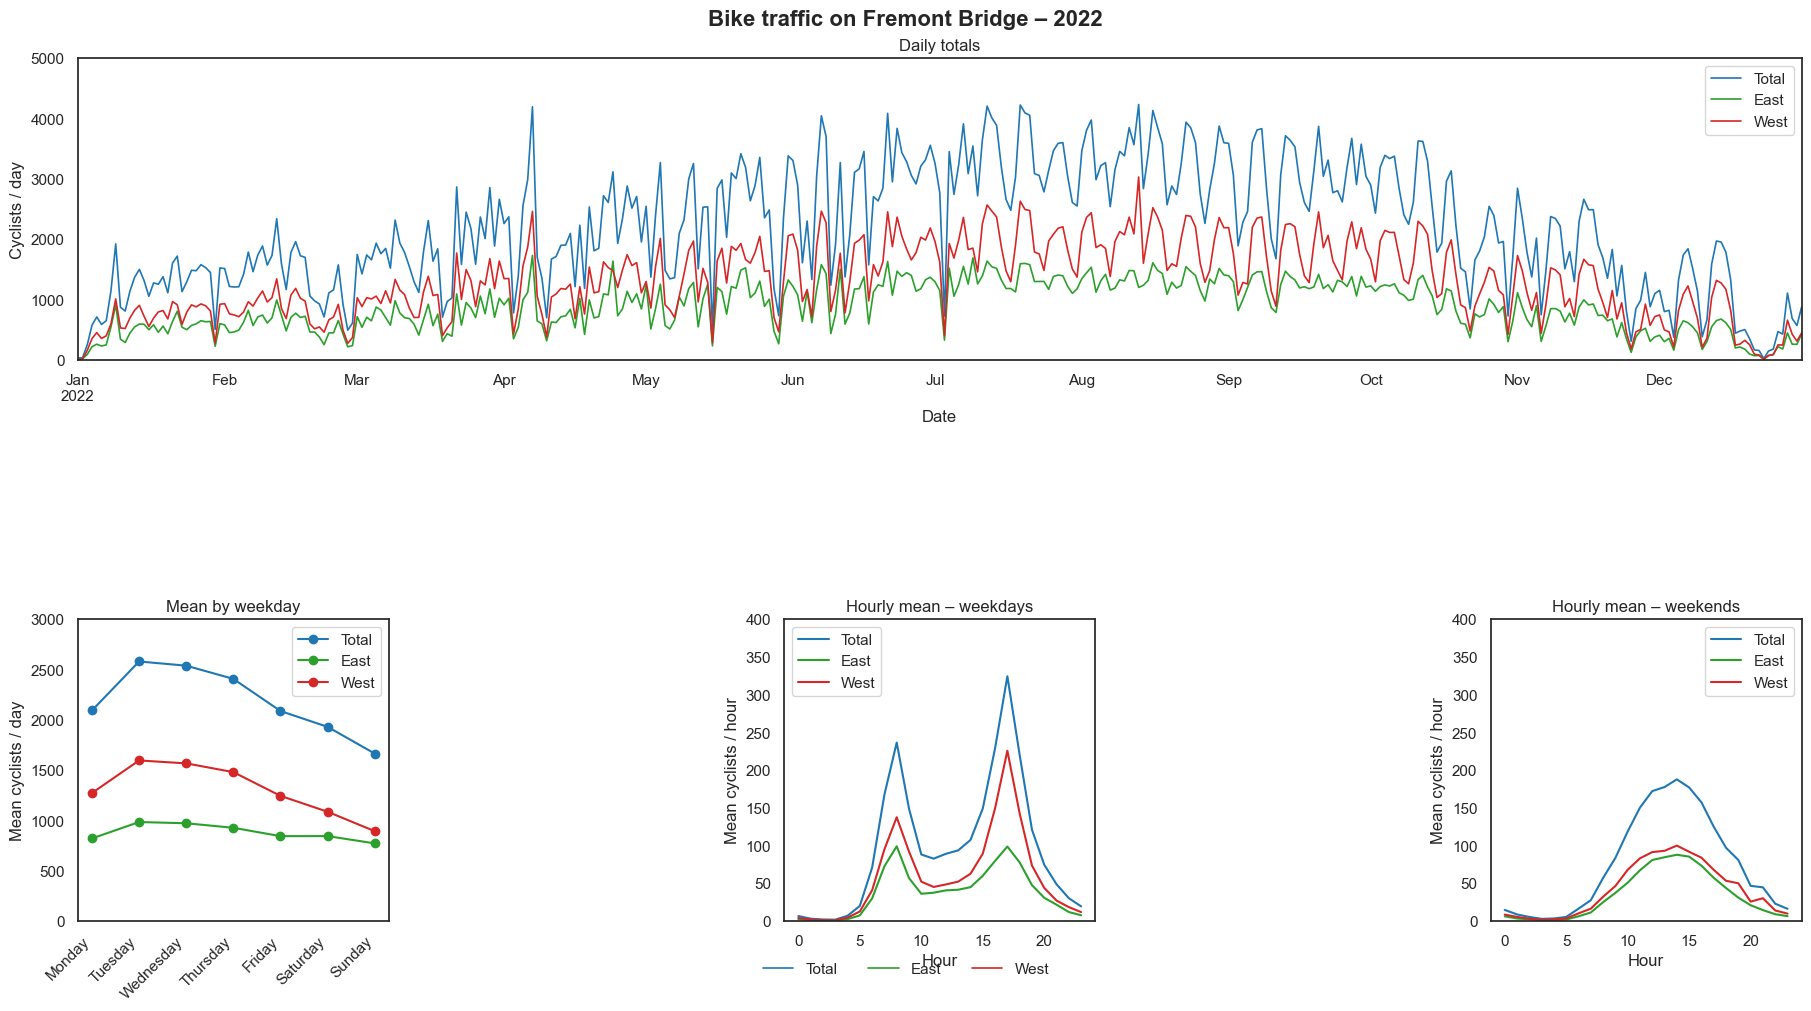

In [17]:
sns.set_style("white") 
colors = {"Total": "tab:blue", "East": "tab:green", "West": "tab:red"}

fig = plt.figure(figsize=(18, 10), facecolor="white", constrained_layout=True)
fig.suptitle("Bike traffic on Fremont Bridge – 2022", fontsize=16, weight="bold")

gs = fig.add_gridspec(2, 3, hspace=0.35, wspace=0.28)

# 1. dzienny ruch (pełna szerokość górnego wiersza)
ax0 = fig.add_subplot(gs[0, :])
daily_bike_traffic_data.plot(
    ax=ax0,
    color=[colors[c] for c in daily_bike_traffic_data.columns],
    linewidth=1.2
)
ax0.set_title("Daily totals")
ax0.set_xlabel("Date")
ax0.set_ylabel("Cyclists / day")
ax0.set_ylim(0, 5000)

# 2. średnia dzienna – weekday
ax1 = fig.add_subplot(gs[1, 0])
bike_traffic_by_weekday_data.plot(
    ax=ax1,
    marker="o",
    color=[colors[c] for c in bike_traffic_by_weekday_data.columns],
    linewidth=1.5
)
ax1.set_title("Mean by weekday")
ax1.set_xlabel("")
ax1.set_ylabel("Mean cyclists / day")
ax1.set_xticks(range(7), bike_traffic_by_weekday_data.index, rotation=45, ha="right")
ax1.set_ylim(0, 3000)

# 3. średnia godzinowa – dni robocze
ax2 = fig.add_subplot(gs[1, 1])
weekday_weekend_hourly_bike_traffic_data["Weekday"].plot(
    ax=ax2,
    color=[colors[c] for c in weekday_weekend_hourly_bike_traffic_data["Weekday"].columns],
    linewidth=1.5
)
ax2.set_title("Hourly mean – weekdays")
ax2.set_xlabel("Hour")
ax2.set_ylabel("Mean cyclists / hour")
ax2.set_ylim(0, 400)

# 4. średnia godzinowa – weekend
ax3 = fig.add_subplot(gs[1, 2])
weekday_weekend_hourly_bike_traffic_data["Weekend"].plot(
    ax=ax3,
    color=[colors[c] for c in weekday_weekend_hourly_bike_traffic_data["Weekend"].columns],
    linewidth=1.5
)
ax3.set_title("Hourly mean – weekends")
ax3.set_xlabel("Hour")
ax3.set_ylabel("Mean cyclists / hour")
ax3.set_ylim(0, 400)

# ---------- wspólna legenda ----------
handles, labels = ax0.get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center",
           ncol=3, frameon=False, fontsize=11, bbox_to_anchor=(0.5, 0.015))

plt.show()


### Zadnie 3: Przegląd danych - pogoda [15 pkt]

#### a) Tabela

Przygotuj tablicę `monthly_weather_data` zawierającą dane z tablicy `weather_data` zagregowane w obrębie poszczególnych miesięcy według następującego klucza:
- wartość minimalna z całego miesiąca: Temperature: Min,
- wartość maksymalna z całego miesiąca: Temperature: Max, Wind: Max speed,
- suma z całego miesiąca: Precipitation: Total, Snow: Fall,
- średnia z całego miesiąca: Temperature: Avg, Snow: Depth, Wind: Avg speed, Sky: Cloud cover.

Tablica powinna zawierać wyłącznie następujące elementy:</br>
> Indeks: Date</br>
> `pandas.DatetimeIndex` zawierający okresy czasu, których dotyczą dane z raportów pogodowych.</br>

> Kolumny: W podanej niżej kolejności</br>
> Temperature: Min, Avg, Max</br>
> Precipitation: Total</br>
> Snow: Fall, Depth</br>
> Wind: Avg speed, Max speed</br>
> Sky: Cloud cover</br>
> (Nazwa 1 poziomu: podległe jej nazwy 2 poziomu)

Wyświetl przygotowaną tablicę w taki sposób aby zawarte w nich wartości wyświetlały się z dokładnością 2 miejsc po przecinku, a indeks pokazywał same daty (rok i miesiąc bez dnia oraz godzin).

In [ ]:
import pandas as pd

# Ustawianie wyświetlania floatów do 2 miejsc po przecinku — ale nie zmienia danych
pd.options.display.float_format = '{:.2f}'.format

# Funkcja do Temperature: Avg z pełną precyzją
temperature_avg_sum = weather_data[('Temperature', 'Avg')].resample('ME').sum(min_count=1)
month_lengths = weather_data[('Temperature', 'Avg')].resample('ME').count().index.days_in_month
temperature_avg_adjusted = temperature_avg_sum / month_lengths

# Reszta agregacji — bez fillna!
agg_funcs = {
    ('Temperature', 'Min'): 'min',
    ('Temperature', 'Max'): 'max',
    ('Precipitation', 'Total'): 'sum',
    ('Snow', 'Fall'): 'sum',
    ('Snow', 'Depth'): 'mean',
    ('Wind', 'Avg speed'): 'mean',
    ('Wind', 'Max speed'): 'max',
    ('Sky', 'Cloud cover'): 'mean'
}

# Agregacja pozostałych kolumn
monthly_weather_data = weather_data.resample('ME').agg(agg_funcs)

# Wstawiamy precyzyjnie policzoną Temperature: Avg
monthly_weather_data[('Temperature', 'Avg')] = temperature_avg_adjusted

# Ustawiamy kolejność kolumn
monthly_weather_data = monthly_weather_data[
    [
        ('Temperature', 'Min'),
        ('Temperature', 'Avg'),
        ('Temperature', 'Max'),
        ('Precipitation', 'Total'),
        ('Snow', 'Fall'),
        ('Snow', 'Depth'),
        ('Wind', 'Avg speed'),
        ('Wind', 'Max speed'),
        ('Sky', 'Cloud cover')
    ]
]

# Indeks jako rok-miesiąc
monthly_weather_data.index = monthly_weather_data.index.to_period('M')
monthly_weather_data.index.name = "Date"

# Wyświetlenie (dane nie są zaokrąglone, tylko ich wygląd)
monthly_weather_data

In [ ]:
### Komórka testowa
# Test 1 Kształt tablicy
assert monthly_weather_data.shape == (12, 9)
# Test 2 Kolumny
assert len(set(list(monthly_weather_data.columns)) & set([('Temperature', 'Min'), ('Temperature', 'Avg'), ('Temperature', 'Max'), ('Precipitation', 'Total'),
            ('Snow', 'Fall'), ('Snow', 'Depth'), ('Wind', 'Avg speed'), ('Wind', 'Max speed'), ('Sky', 'Cloud cover')])) == 9
# Test 3 Indeks
assert (monthly_weather_data.index.name == 'Date') == True
assert isinstance(bike_traffic_data.index, pd.DatetimeIndex)
assert bike_traffic_data.index.values.min() == np.datetime64('2022-01-01T00:00:00.000000000')
assert bike_traffic_data.index.values.max() == np.datetime64('2022-12-31T23:00:00.000000000')
# Test 4 Zawartość kolumn
assert np.all(np.isclose(monthly_weather_data.min().values, np.array([-7.77777778, 3.90681004, 13.33333333, 1.27, 0., 0., 2.93603606, 8.0467, 0.43870968]))) == True
assert np.all(np.isclose(monthly_weather_data.max().values, np.array([11.66666667, 21.27240143, 35., 191.77, 119.38, 5.08, 3.97864611, 16.54043889, 0.86774194]))) == True

#### b) Wykresy

Zwizualizuj dane z tablicy `weather_data` za pomocą następującego zestawu wykresów:
- temperatura dzienna (minimalna, średnia i maksymalna), wypełnij kolorem przestrzeń między temperaturą minimalną i maksymalną,
- dzienne zachmurzenie (lewa oś wykresu) i opady (prawa oś wykresu), wypełnij kolorem przestrzeń pod każdym z wykresów,
- dzienna średnia i maksymalna prędkość wiatru.

Zestaw wykresy na pojedynczej figurze (siatka wykresów 3x1). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw różne od domyślnych i od siebie nawzajem kolory wykresów poszczególnych parametrów,
- dodaj do figury pojedynczą legendę zawierającą nazwy wizualizowanych parametrów i zlokalizowaną w dolnej części figury, pod wykresami, uwzględnij w legendzie nie tylko kolory linii, ale również zastosowanych wypełnień,
- dopasuj zakresy osi wykresów do zakresu danych, w szczególności dobierz skale osi Y tak, aby wykresy opadów i zachmurzenia nie przysłaniały się wzajemnie,
- w opisach osi Y umieść jednostki, w których wyrażone są wartości widoczne na wykresach.

In [ ]:
# --- Interpolacja temperatury --- #
weather_temp_interp = weather_data.loc[:, [
    ('Temperature', 'Min'),
    ('Temperature', 'Avg'),
    ('Temperature', 'Max')
]].copy()

# Zamieniamy nazwy kolumn na prostsze
weather_temp_interp.columns = ['Temperature: Min', 'Temperature: Avg', 'Temperature: Max']

# Interpolacja braków danych
weather_temp_interp = weather_temp_interp.interpolate(method='time')

# --- Filtrowanie dat na 2022 --- #
mask_2022 = (pd.to_datetime(weather_temp_interp.index) >= '2022-01-01') & \
            (pd.to_datetime(weather_temp_interp.index) <= '2022-12-31')
dates_2022 = pd.to_datetime(weather_temp_interp.index[mask_2022]).to_numpy(dtype='datetime64[ns]')

# Linie temperatury (interpolowane)
temp_min_i = weather_temp_interp.loc[mask_2022, 'Temperature: Min'].to_numpy(dtype='float64')
temp_avg_i = weather_temp_interp.loc[mask_2022, 'Temperature: Avg'].to_numpy(dtype='float64')
temp_max_i = weather_temp_interp.loc[mask_2022, 'Temperature: Max'].to_numpy(dtype='float64')

# Fill między min-max (oryginalne, z NaN)
temp_min_raw = weather_data[('Temperature', 'Min')].loc[mask_2022].to_numpy(dtype='float64')
temp_max_raw = weather_data[('Temperature', 'Max')].loc[mask_2022].to_numpy(dtype='float64')

# Pozostałe dane
cloud_cover = weather_data[('Sky', 'Cloud cover')].loc[mask_2022].fillna(0).to_numpy(dtype='float64')
precip = weather_data[('Precipitation', 'Total')].loc[mask_2022].fillna(0).to_numpy(dtype='float64')
wind_avg = weather_data[('Wind', 'Avg speed')].loc[mask_2022].fillna(0).to_numpy(dtype='float64')
wind_max = weather_data[('Wind', 'Max speed')].loc[mask_2022].fillna(0).to_numpy(dtype='float64')

# --- Tworzenie wykresów --- #
fig, axes = plt.subplots(3, 1, figsize=(16, 12))
fig.suptitle("Parametry pogody w Seattle w 2022 roku", fontsize=18, weight="bold", y=1.02)

# --- Wykres 1: Temperatura --- #
l1 = axes[0].plot(dates_2022, temp_min_i, label='Temperatura minimalna', color='blue')[0]
l2 = axes[0].plot(dates_2022, temp_avg_i, label='Temperatura średnia', color='orange')[0]
l3 = axes[0].plot(dates_2022, temp_max_i, label='Temperatura maksymalna', color='red')[0]
f1 = axes[0].fill_between(dates_2022, temp_min_raw, temp_max_raw, color='green', alpha=0.3, label='Zakres temperatury')
axes[0].set_ylabel('Temperatura [°C]')
axes[0].set_ylim(-20, 40)
axes[0].set_yticks(range(-20, 41, 10))
axes[0].set_xlim(np.datetime64('2022-01-01'), np.datetime64('2022-12-31'))
axes[0].set_title('Temperatura dzienna')
axes[0].xaxis_date()
axes[0].set_xlabel('Data')

# --- Wykres 2: Zachmurzenie i opady --- #
f2 = axes[1].fill_between(dates_2022, cloud_cover, color='#6495ED', alpha=0.4, label='Zachmurzenie')
ax2 = axes[1].twinx()
f3 = ax2.fill_between(dates_2022, precip, color='#2E8B57', alpha=0.4, label='Opady')
axes[1].set_ylabel('Zachmurzenie [okta]')
axes[1].set_ylim(0, 1)
ax2.set_ylabel('Opady [mm]')
ax2.set_ylim(0, 100)
ax2.set_yticks(range(0, 101, 20))
axes[1].set_xlim(np.datetime64('2022-01-01'), np.datetime64('2022-12-31'))
axes[1].set_title('Zachmurzenie i opady dzienne')
axes[1].xaxis_date()
axes[1].set_xlabel('Data')
# --- Wykres 3: Wiatr --- #
l4 = axes[2].plot(dates_2022, wind_avg, label='Wiatr średni', color='#800080')[0]
l5 = axes[2].plot(dates_2022, wind_max, label='Wiatr maksymalny', color='#DC143C')[0]
axes[2].set_ylabel('Prędkość wiatru [km/h]')
axes[2].set_ylim(0, 20)
axes[2].set_yticks(np.arange(0, 20.1, 2.5))
axes[2].set_xlim(np.datetime64('2022-01-01'), np.datetime64('2022-12-31'))
axes[2].set_title('Prędkość wiatru dzienna')
axes[2].set_xlabel('Data')
axes[2].xaxis_date()

# --- Wspólna legenda --- #
fig.legend(
    handles=[l1, l2, l3, f1, f2, f3, l4, l5],
    labels=['Temperatura minimalna', 'Temperatura średnia', 'Temperatura maksymalna', 'Zakres temperatury',
            'Zachmurzenie', 'Opady', 'Wiatr średni', 'Wiatr maksymalny'],
    loc='lower center',
    bbox_to_anchor=(0.5, 0.02),
    ncol=4
)

# --- Dostosowanie i auto-formatowanie dat --- #
axes[0].xaxis_date()
axes[1].xaxis_date()
axes[2].xaxis_date()
plt.subplots_adjust(top=0.95, bottom=0.15, left=0.05, right=0.95, hspace=0.35)
plt.show()